In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:\\Users\\ravin\\Downloads\\Folders\\Global Terrorism - START data\\gt.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics of the dataframe
print(df.describe())

# Display information about the dataframe
print(df.info())


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\3578795516.py:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill or drop missing values as appropriate
df['city'].fillna('Unknown', inplace=True)
df['provstate'].fillna('Unknown', inplace=True)
df.fillna(0, inplace=True)


approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\2602236170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')


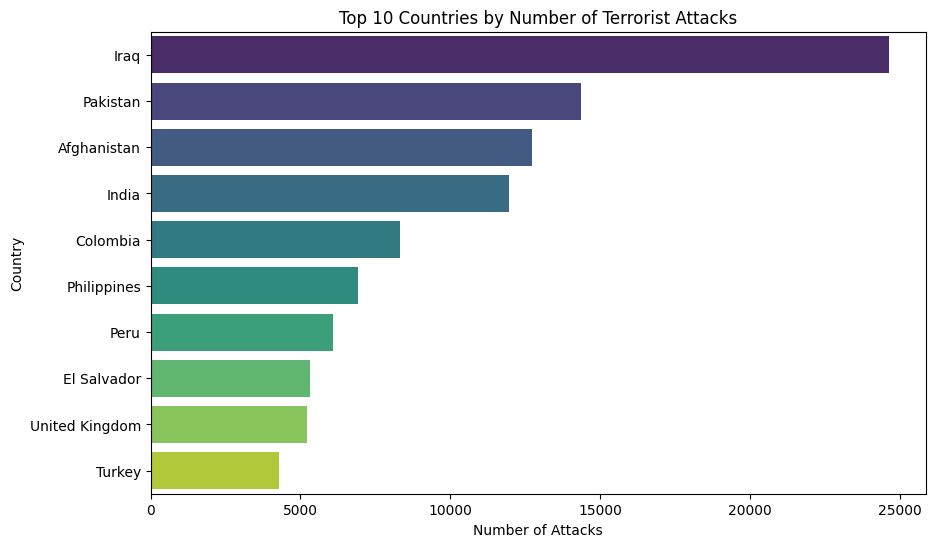

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\2602236170.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette='plasma')


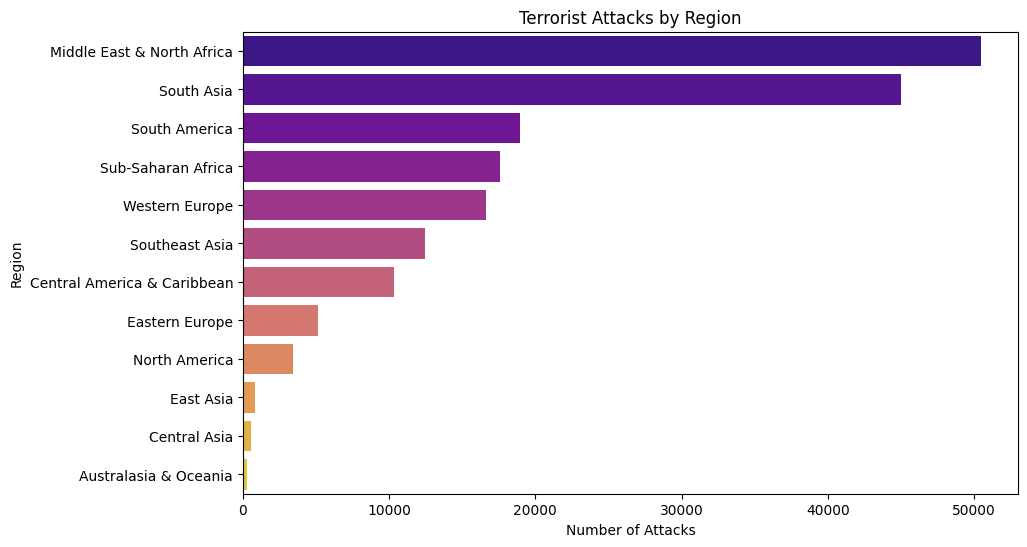

In [3]:
# Count incidents by country
country_counts = df['country_txt'].value_counts().head(10)
print(country_counts)

# Visualize incidents by country
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Number of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

# Count incidents by region
region_counts = df['region_txt'].value_counts()
print(region_counts)

# Visualize incidents by region
plt.figure(figsize=(10, 6))
sns.barplot(y=region_counts.index, x=region_counts.values, palette='plasma')
plt.title('Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


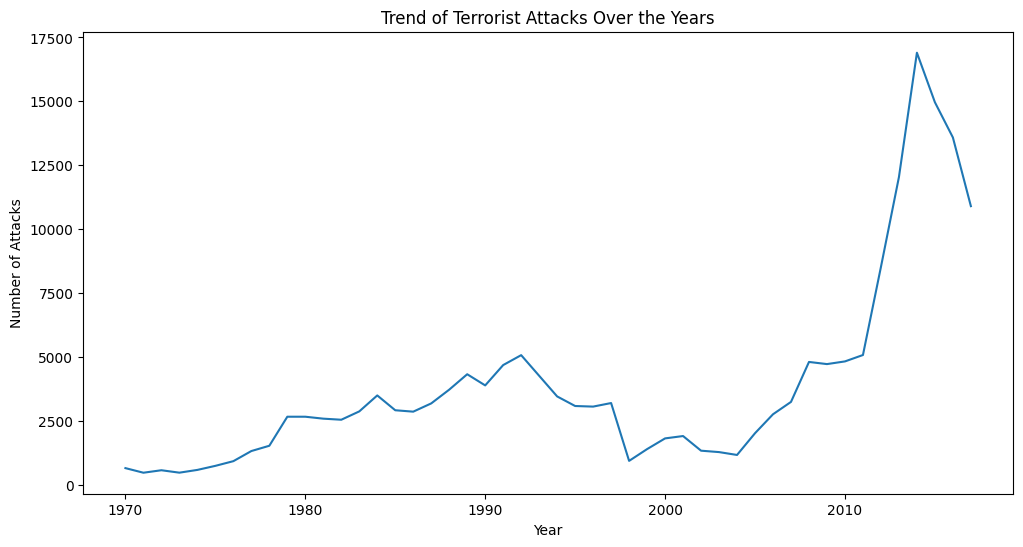

attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\4035031537.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='coolwarm')


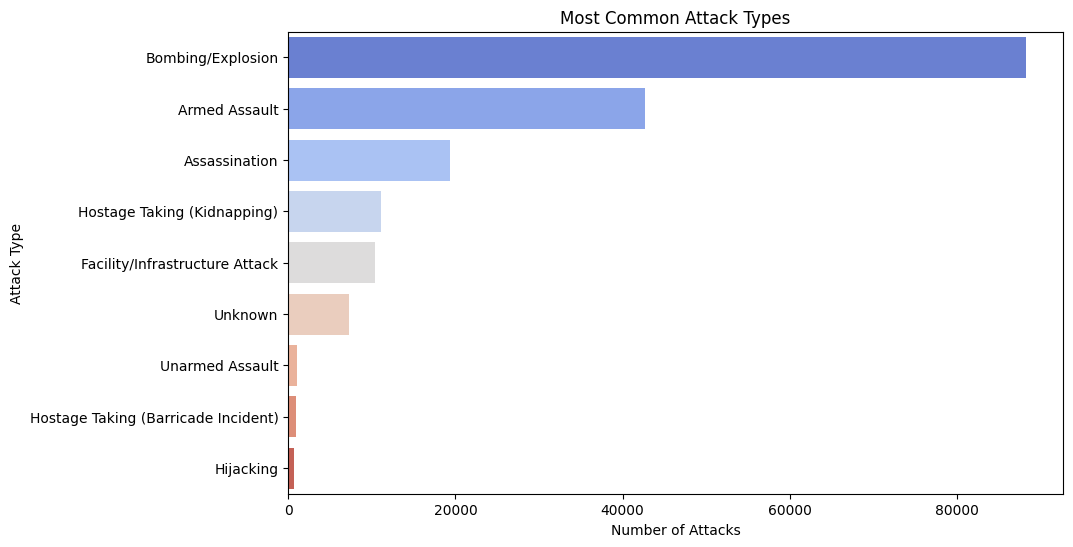

targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\4035031537.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=target_type_counts.index, x=target_type_counts.values, palette='magma')


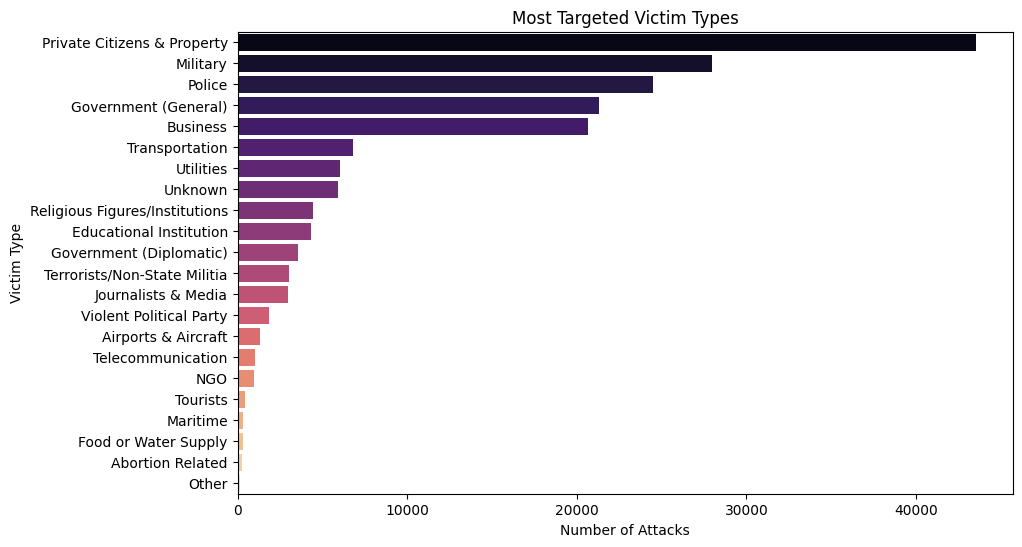

In [4]:
# Trend of attacks over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('iyear').size())
plt.title('Trend of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# Most common attack types
attack_type_counts = df['attacktype1_txt'].value_counts()
print(attack_type_counts)

# Visualize common attack types
plt.figure(figsize=(10, 6))
sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='coolwarm')
plt.title('Most Common Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

# Analysis of the most targeted types of victims
target_type_counts = df['targtype1_txt'].value_counts()
print(target_type_counts)

# Visualize target types
plt.figure(figsize=(10, 6))
sns.barplot(y=target_type_counts.index, x=target_type_counts.values, palette='magma')
plt.title('Most Targeted Victim Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Victim Type')
plt.show()


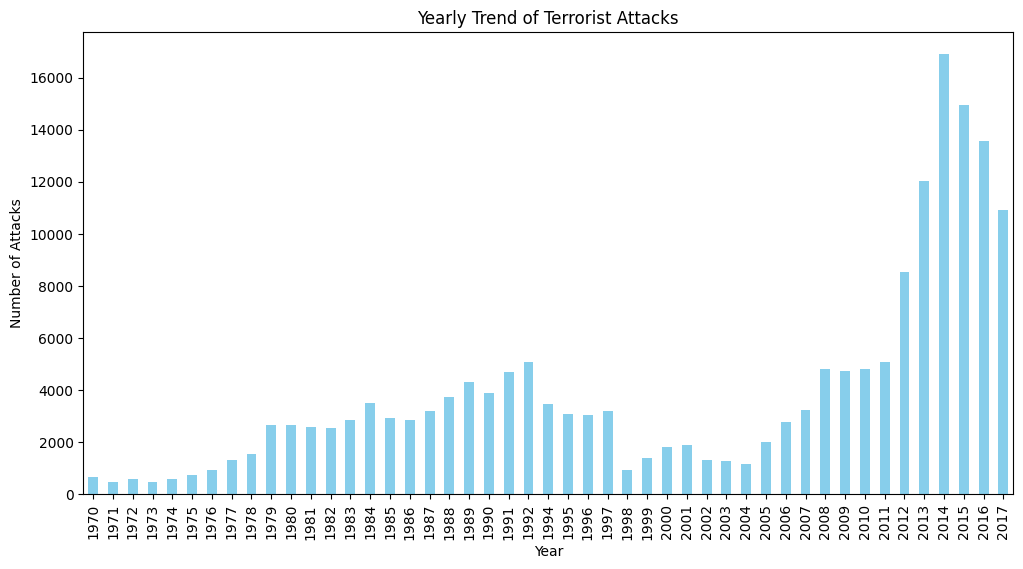

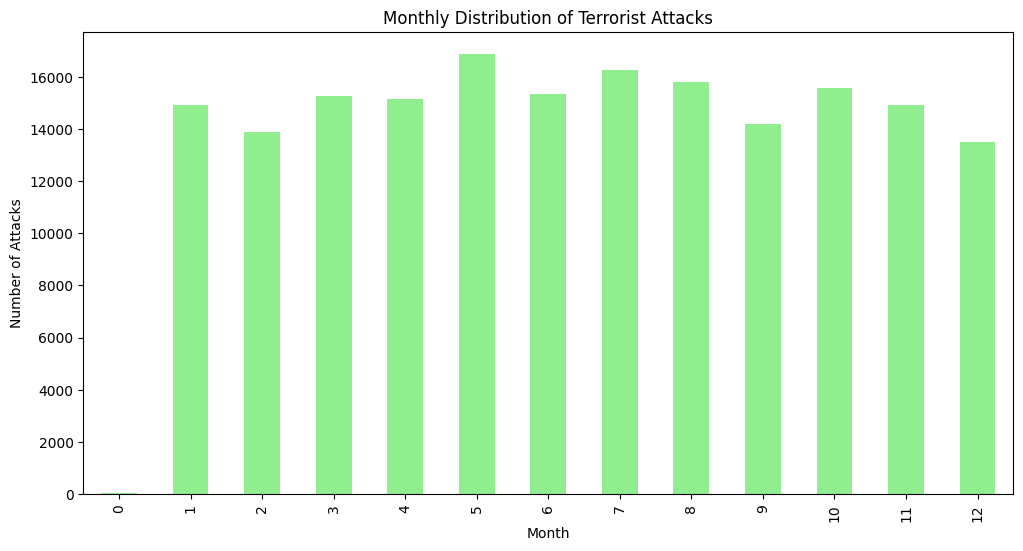

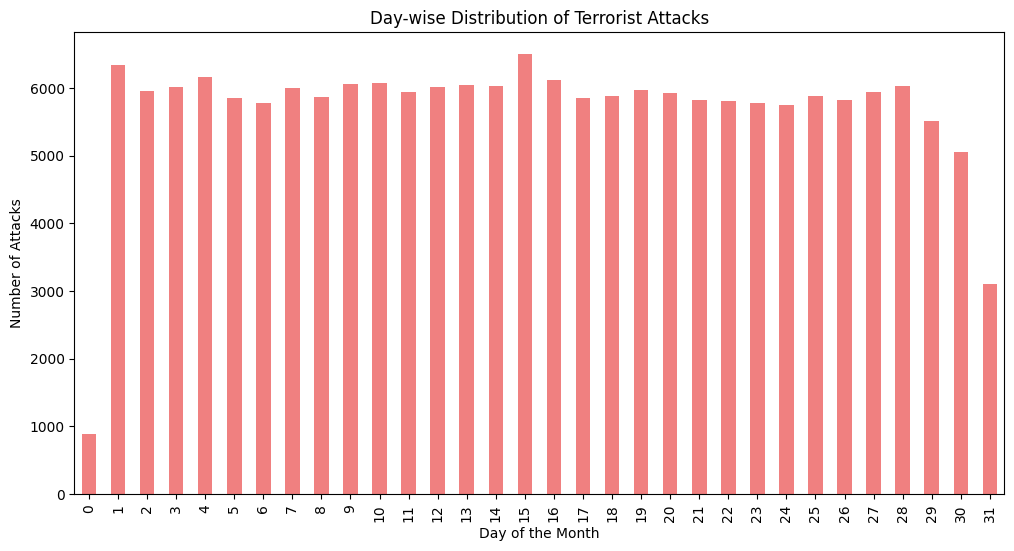

In [5]:
# Yearly trend of terrorist activities
plt.figure(figsize=(12, 6))
df.groupby('iyear').size().plot(kind='bar', color='skyblue')
plt.title('Yearly Trend of Terrorist Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# Monthly distribution of terrorist activities
plt.figure(figsize=(12, 6))
df['imonth'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Monthly Distribution of Terrorist Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

# Day-wise distribution of terrorist activities
plt.figure(figsize=(12, 6))
df['iday'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Day-wise Distribution of Terrorist Attacks')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Attacks')
plt.show()


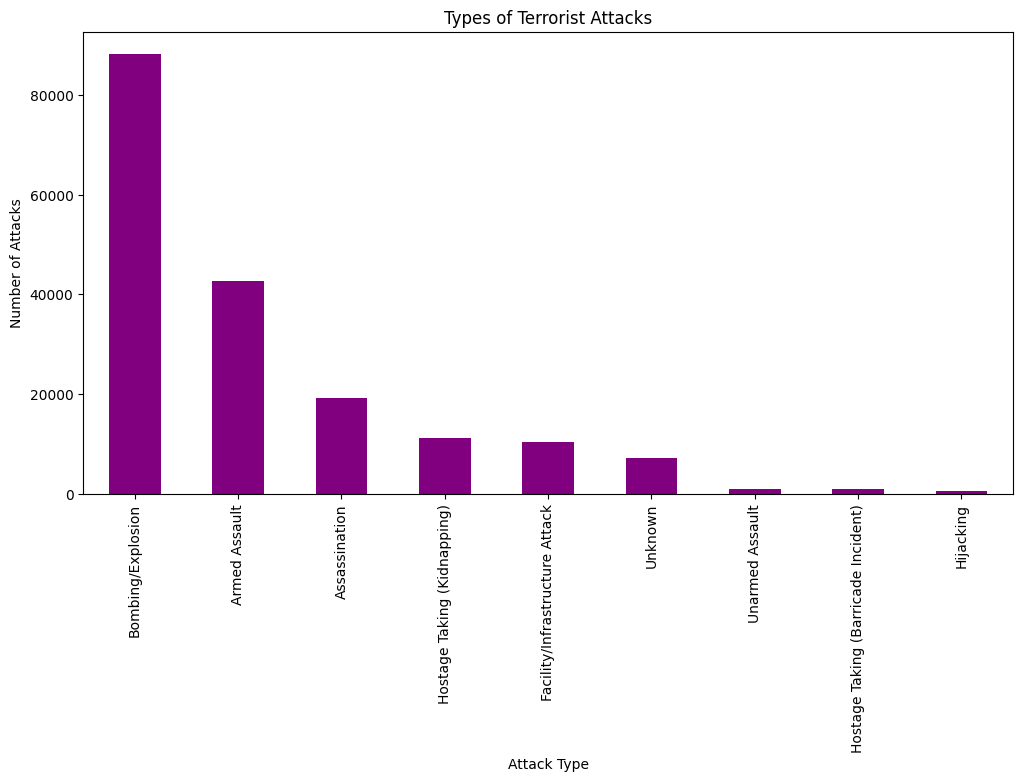

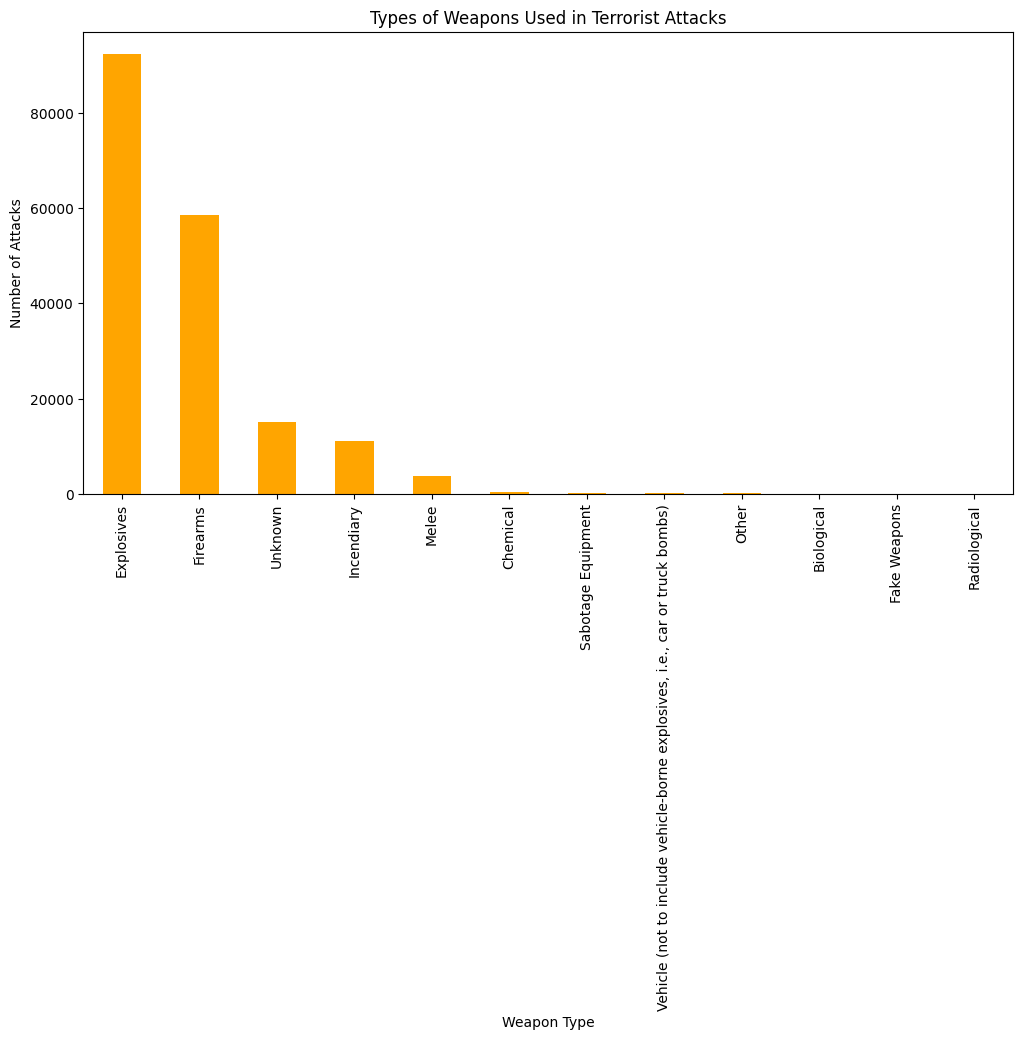

In [6]:
# Attack types
plt.figure(figsize=(12, 6))
df['attacktype1_txt'].value_counts().plot(kind='bar', color='purple')
plt.title('Types of Terrorist Attacks')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

# Weapon types
plt.figure(figsize=(12, 6))
df['weaptype1_txt'].value_counts().plot(kind='bar', color='orange')
plt.title('Types of Weapons Used in Terrorist Attacks')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.show()


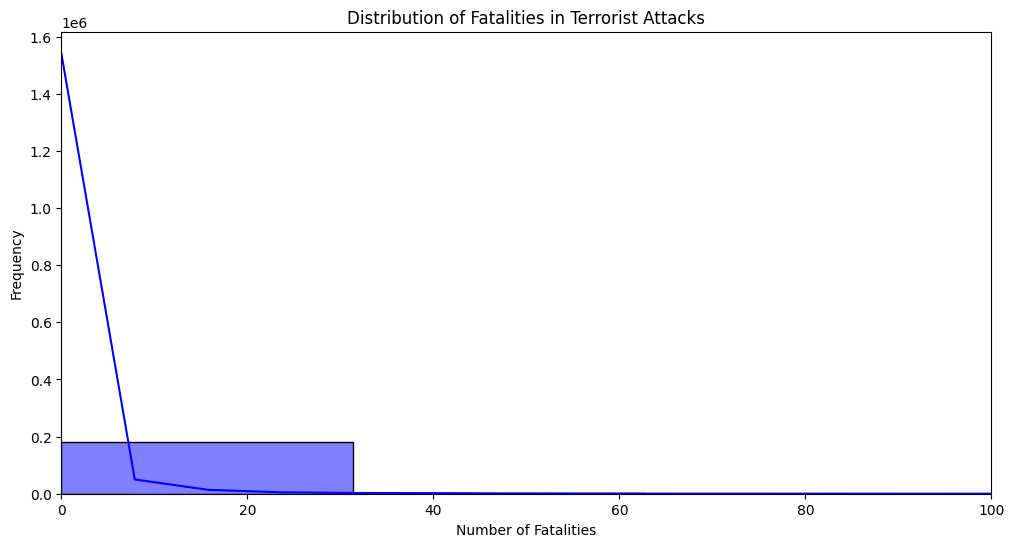

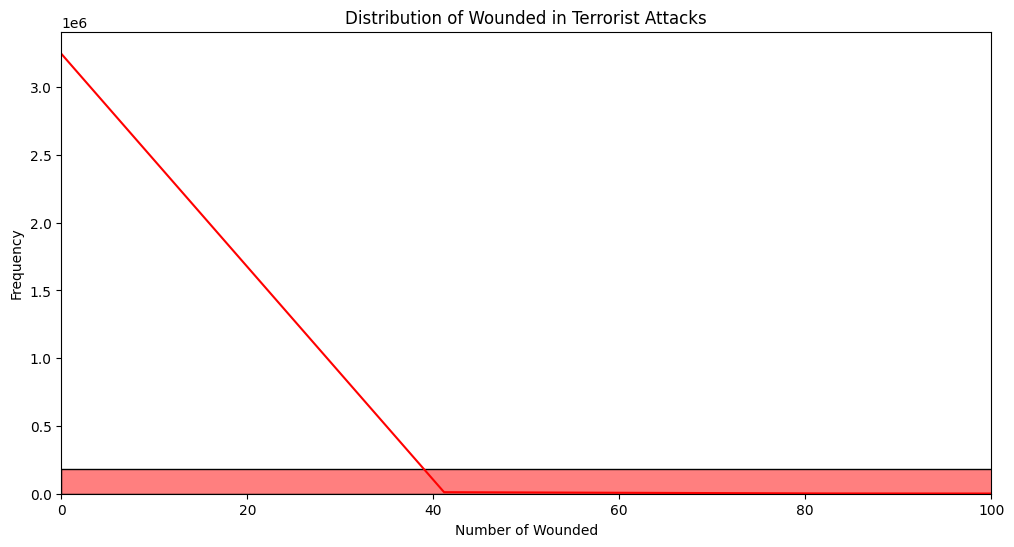

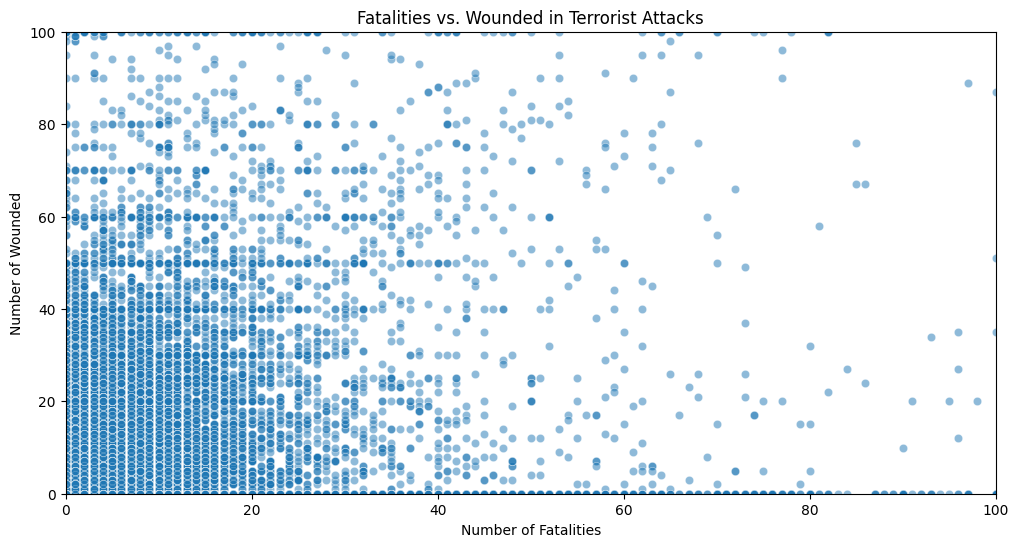

In [7]:
# Distribution of fatalities
plt.figure(figsize=(12, 6))
sns.histplot(df['nkill'], bins=50, kde=True, color='blue')
plt.title('Distribution of Fatalities in Terrorist Attacks')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

# Distribution of wounded
plt.figure(figsize=(12, 6))
sns.histplot(df['nwound'], bins=50, kde=True, color='red')
plt.title('Distribution of Wounded in Terrorist Attacks')
plt.xlabel('Number of Wounded')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

# Scatter plot of fatalities vs. wounded
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nkill', y='nwound', data=df, alpha=0.5)
plt.title('Fatalities vs. Wounded in Terrorist Attacks')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Wounded')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()


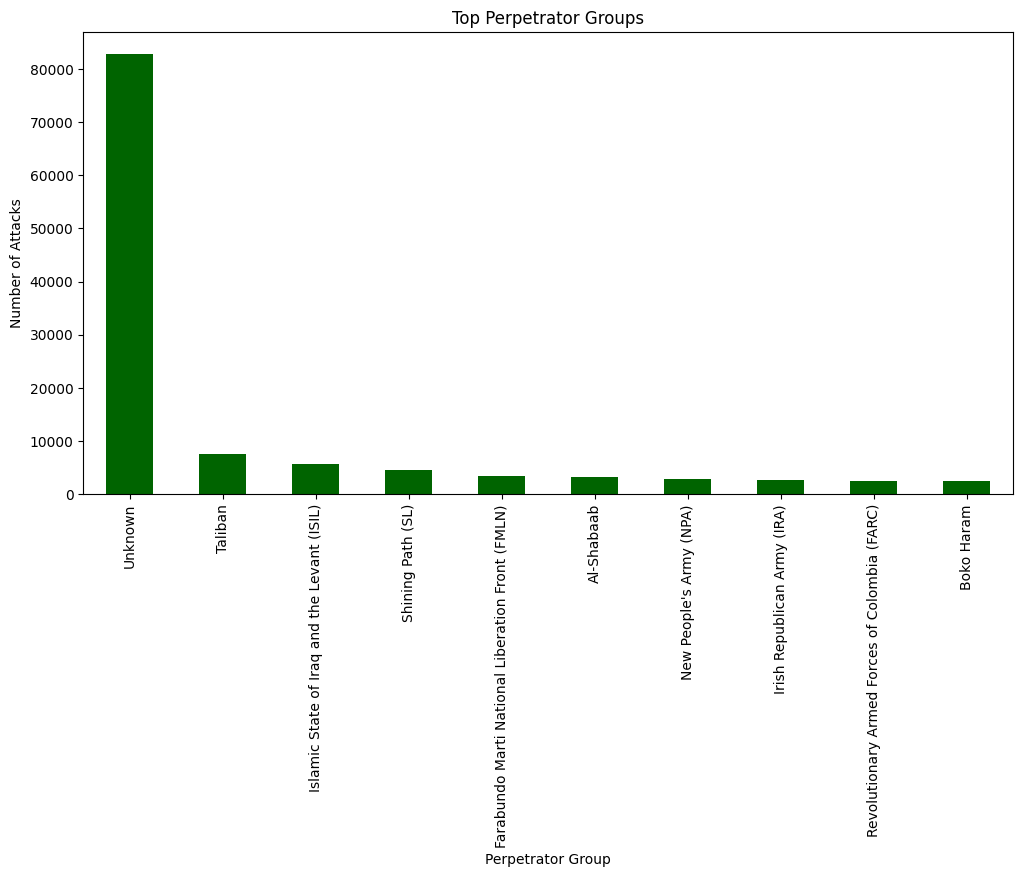

C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\3528335211.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='guncertain1', data=df, palette='Set1')


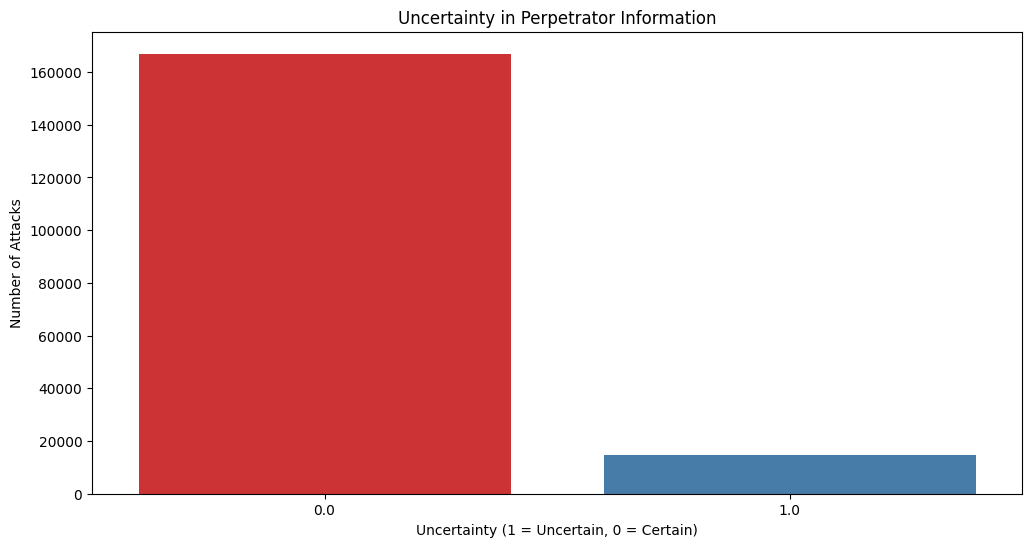

In [8]:
# Top perpetrator groups
plt.figure(figsize=(12, 6))
df['gname'].value_counts().head(10).plot(kind='bar', color='darkgreen')
plt.title('Top Perpetrator Groups')
plt.xlabel('Perpetrator Group')
plt.ylabel('Number of Attacks')
plt.show()

# Uncertainty in perpetrator information
plt.figure(figsize=(12, 6))
sns.countplot(x='guncertain1', data=df, palette='Set1')
plt.title('Uncertainty in Perpetrator Information')
plt.xlabel('Uncertainty (1 = Uncertain, 0 = Certain)')
plt.ylabel('Number of Attacks')
plt.show()


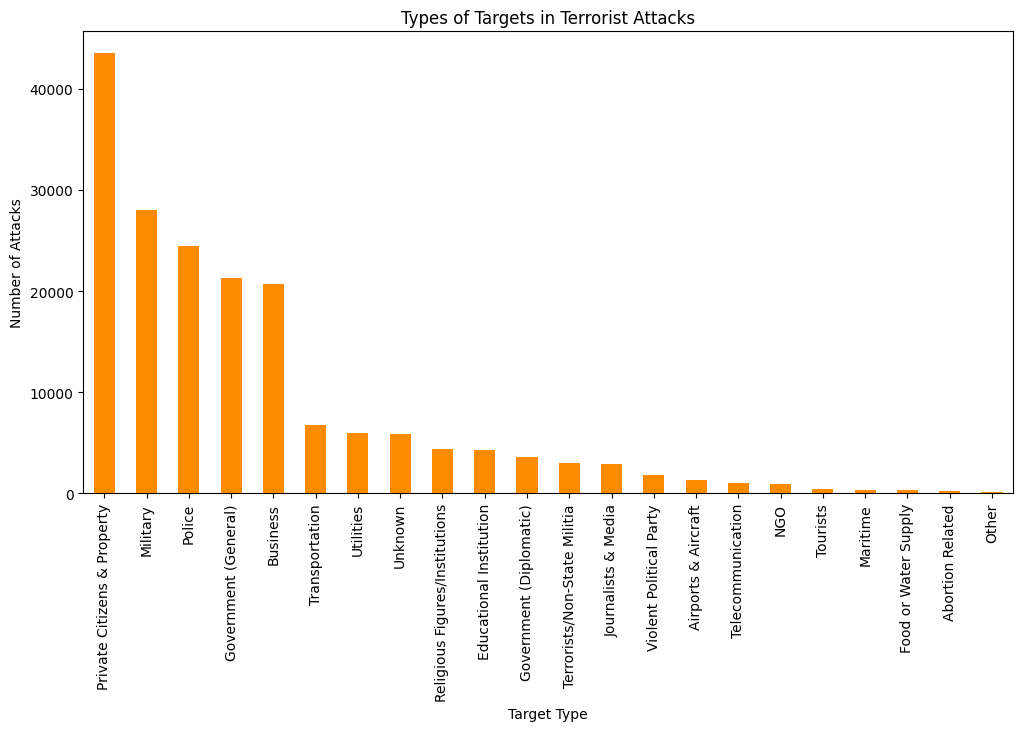

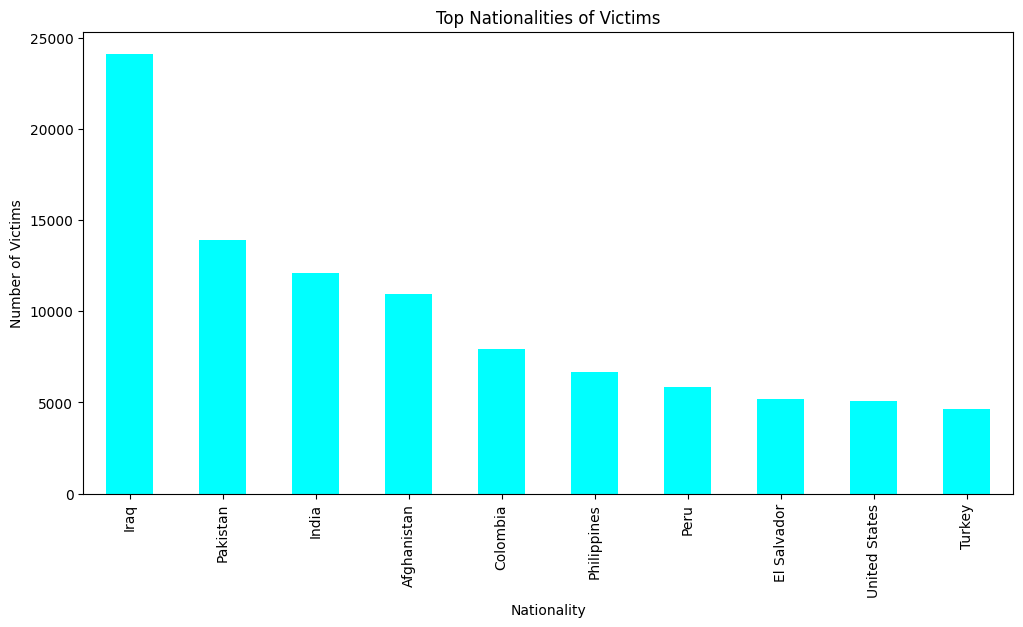

In [9]:
# Target types
plt.figure(figsize=(12, 6))
df['targtype1_txt'].value_counts().plot(kind='bar', color='darkorange')
plt.title('Types of Targets in Terrorist Attacks')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.show()

# Victims by nationality
plt.figure(figsize=(12, 6))
df['natlty1_txt'].value_counts().head(10).plot(kind='bar', color='cyan')
plt.title('Top Nationalities of Victims')
plt.xlabel('Nationality')
plt.ylabel('Number of Victims')
plt.show()


C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\2540857825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='iyear', data=country_df, palette='coolwarm')


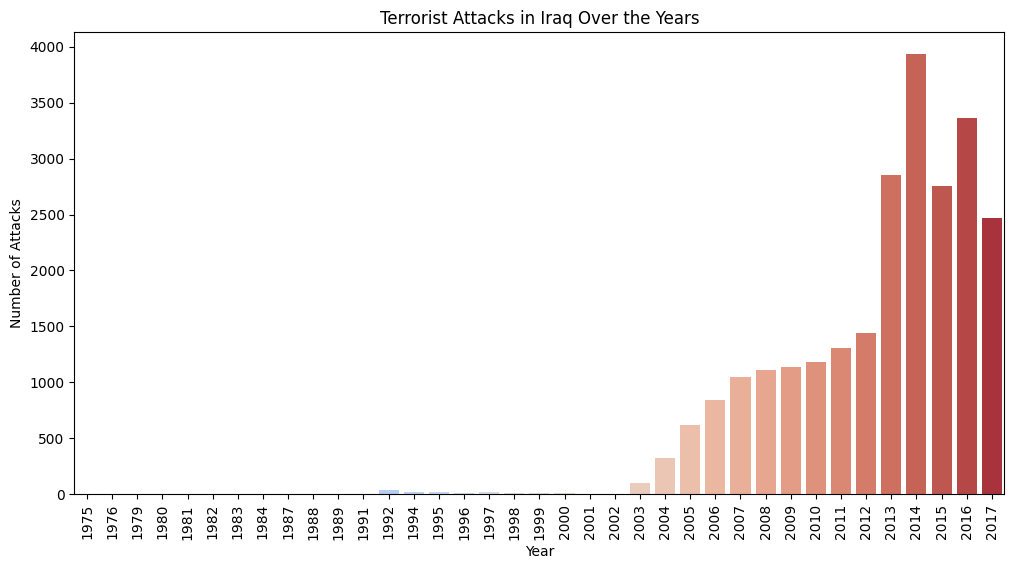

C:\Users\ravin\AppData\Local\Temp\ipykernel_23780\2540857825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='iyear', data=country_df, palette='coolwarm')


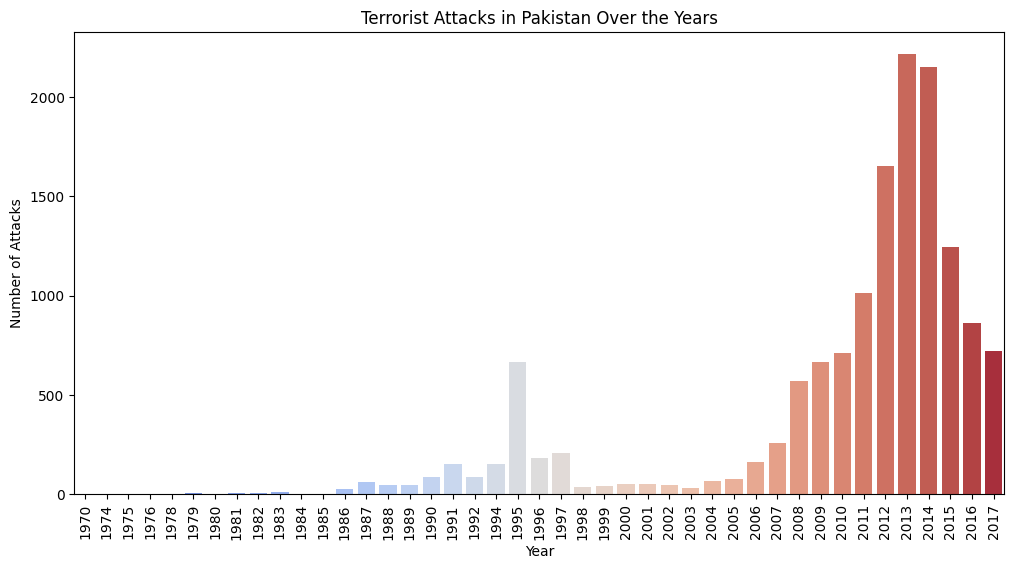

In [10]:
# Incidents in specific countries (e.g., Iraq, Pakistan)
for country in ['Iraq', 'Pakistan']:
    country_df = df[df['country_txt'] == country]
    plt.figure(figsize=(12, 6))
    sns.countplot(x='iyear', data=country_df, palette='coolwarm')
    plt.title(f'Terrorist Attacks in {country} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=90)
    plt.show()

# Geographic clustering of incidents within a country (e.g., India)
import folium
from folium.plugins import MarkerCluster

# Filter data for a specific country (e.g., India)
india_df = df[df['country_txt'] == 'India']

# Create a map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add incidents to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in india_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['city']).add_to(marker_cluster)

# Display the map
m.save('india_terrorism_map.html')


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, accuracy_score
import xgboost as xgb
# Fill missing categorical values
df['city'].fillna('Unknown', inplace=True)
df['provstate'].fillna('Unknown', inplace=True)

# Fill remaining missing values with 0
df.fillna(0, inplace=True)

# Verify missing values
df.isnull().sum()


eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [14]:
# Label Encoding for categorical variables
encoder = LabelEncoder()

df['attacktype1_txt'] = encoder.fit_transform(df['attacktype1_txt'])  # Encode Attack Type
df['targtype1_txt'] = encoder.fit_transform(df['targtype1_txt'])  # Encode Target Type
df['weaptype1_txt'] = encoder.fit_transform(df['weaptype1_txt'])  # Encode Weapon Type

# Define feature columns for Regression (Fatalities) - Attack Type is a valid feature here
features_reg = ['iyear', 'imonth', 'iday', 'country', 'region', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt']

# Define feature columns for Classification (Attack Type) - Attack Type MUST be removed to avoid leakage
features_clf = ['iyear', 'imonth', 'iday', 'country', 'region', 'targtype1_txt', 'weaptype1_txt']

# Define targets
target_regression = 'nkill'  # Predicting fatalities
target_classification = 'attacktype1_txt'  # Predicting attack type


In [16]:
# Splitting data for Regression Task
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features_reg], df[target_regression], test_size=0.2, random_state=42)

# Splitting data for Classification Task
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df[features_clf], df[target_classification], test_size=0.2, random_state=42)


In [17]:
# Standardization
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


In [18]:
# Initialize XGBoost Regressor
regressor = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the model
print("\n🔹 Regression Model Performance (Predicting Fatalities):")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.2f}")



🔹 Regression Model Performance (Predicting Fatalities):
Mean Absolute Error (MAE): 2.61
Mean Squared Error (MSE): 83.79
Root Mean Squared Error (RMSE): 9.15


In [19]:
# Initialize Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
classifier.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = classifier.predict(X_test_clf)

# Evaluate the model
print("\n🔹 Classification Model Performance (Predicting Attack Type):")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))



🔹 Classification Model Performance (Predicting Attack Type):
Accuracy: 0.9919
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8485
           1       1.00      1.00      1.00      3808
           2       1.00      1.00      1.00     17682
           3       0.99      1.00      1.00      2080
           4       0.95      0.45      0.61       123
           5       0.99      0.42      0.59       214
           6       0.89      1.00      0.94      2220
           7       1.00      0.60      0.75       223
           8       1.00      1.00      1.00      1504

    accuracy                           0.99     36339
   macro avg       0.98      0.83      0.88     36339
weighted avg       0.99      0.99      0.99     36339



In [20]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

# Display best parameters
print("\n🔹 Best Parameters for Classification Model:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")



🔹 Best Parameters for Classification Model: {'max_depth': 15, 'n_estimators': 200}
Best Accuracy: 0.9987


In [21]:
# Install TensorFlow if not installed
!pip install tensorflow

# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Build the Regression Neural Network
regressor_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
regressor_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_reg = regressor_model.fit(X_train_reg, y_train_reg, epochs=50, batch_size=32, validation_data=(X_test_reg, y_test_reg), verbose=1)

# Evaluate the model
y_pred_reg = regressor_model.predict(X_test_reg)
print("\n🔹 Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.2f}")



Epoch 1/50


4543/4543 [==============================] - 10s 2ms/step - loss: 123.5389 - mae: 2.8137 - val_loss: 126.3778 - val_mae: 2.6064
Epoch 2/50
4543/4543 [==============================] - 8s 2ms/step - loss: 122.8648 - mae: 2.7674 - val_loss: 125.9400 - val_mae: 2.8316
Epoch 3/50
4543/4543 [==============================] - 8s 2ms/step - loss: 122.4383 - mae: 2.7585 - val_loss: 125.5062 - val_mae: 2.8135
Epoch 4/50
4543/4543 [==============================] - 7s 2ms/step - loss: 122.3081 - mae: 2.7527 - val_loss: 125.6124 - val_mae: 2.5517
Epoch 5/50
4543/4543 [==============================] - 7s 1ms/step - loss: 122.0489 - mae: 2.7348 - val_loss: 125.5050 - val_mae: 2.8014
Epoch 6/50
4543/4543 [==============================] - 7s 2ms/step - loss: 121.7967 - mae: 2.7444 - val_loss: 126.0206 - val_mae: 2.8345
Epoch 7/50
4543/4543 [==============================] - 7s 1ms/step - loss: 121.8745 - mae: 2.7410 - val_loss: 125.4528 - val_mae: 2.6666
Epoch 8/50
4543/4543 [========

In [23]:
# Convert labels to categorical format for multi-class classification
num_classes = len(np.unique(y_train_clf))
y_train_clf_categorical = keras.utils.to_categorical(y_train_clf, num_classes)
y_test_clf_categorical = keras.utils.to_categorical(y_test_clf, num_classes)

# Build the Classification Neural Network
classifier_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_clf.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
classifier_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_clf = classifier_model.fit(X_train_clf, y_train_clf_categorical, epochs=50, batch_size=32, validation_data=(X_test_clf, y_test_clf_categorical), verbose=1)

# Evaluate the model
y_pred_clf_prob = classifier_model.predict(X_test_clf)
y_pred_clf = np.argmax(y_pred_clf_prob, axis=1)

print("\n🔹 Classification Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))


Epoch 1/50
4543/4543 [==============================] - 9s 2ms/step - loss: 0.0797 - accuracy: 0.9744 - val_loss: 0.0206 - val_accuracy: 0.9940
Epoch 2/50
4543/4543 [==============================] - 8s 2ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0102 - val_accuracy: 0.9974
Epoch 3/50
4543/4543 [==============================] - 8s 2ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0067 - val_accuracy: 0.9977
Epoch 4/50
4543/4543 [==============================] - 7s 2ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0054 - val_accuracy: 0.9984
Epoch 5/50
4543/4543 [==============================] - 7s 2ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0058 - val_accuracy: 0.9981
Epoch 6/50
4543/4543 [==============================] - 8s 2ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 7/50
4543/4543 [==============================] - 7s 2ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0023 - val_accuracy:

In [24]:
print("\n🔹 Classification Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))


🔹 Classification Model Performance:
Accuracy: 0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8485
           1       1.00      1.00      1.00      3808
           2       1.00      1.00      1.00     17682
           3       1.00      1.00      1.00      2080
           4       1.00      1.00      1.00       123
           5       1.00      1.00      1.00       214
           6       1.00      1.00      1.00      2220
           7       1.00      0.99      1.00       223
           8       1.00      1.00      1.00      1504

    accuracy                           1.00     36339
   macro avg       1.00      1.00      1.00     36339
weighted avg       1.00      1.00      1.00     36339

